### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÌôïÏù∏ (2 Cycle)

In [1]:
import pandas as pd

f_df = pd.read_csv('./datasets/flight.csv')
f_df

Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [2]:
pre_f_df = f_df.drop(labels=['Unnamed: 0'], axis=1)
pre_f_df

airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city     class  duration  days_left  price  
0                Mumbai   Economy      2.17          1   5953  
1                Mumbai   Economy      2.33          1   5953  
2                Mumbai   Economy      2.17          1   5956  
3                Mumbai   Economy      2.25          1   5955  
4                Mumbai   Economy      2.33          1   5955  
...                 ...       ...       ...        ...    ...  
300148        Hyderabad  Business     10.08         49  69265  
300149        Hyderabad  Business     10.42         49  77105  
300150        Hyderabad  Business     13.83         49  79099  
300151        Hyderabad  Business     10.00         49  81585  
300152        Hyderabad  Business     10.08         49  81585  

[300153 rows x 11 columns]

In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# ÏàúÏÑú Ï†ïÏùò
class_order = np.array(['Economy', 'Business'])
time_order = np.array(['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
stops_order = np.array(['zero', 'one', 'two_or_more'])

# ÎùºÎ≤® Ïù∏ÏΩîÎî©Ìï† Ïó¥ Î™©Î°ù
columns_to_encode = ['class', 'departure_time', 'arrival_time', 'stops']

# LabelEncoder Í∞ùÏ≤¥ ÏÉùÏÑ±
encoder = LabelEncoder()

# ÎùºÎ≤® Ïù∏ÏΩîÎî© ÏàòÌñâ
for column in columns_to_encode:
    if column == 'class':
        encoder.classes_ = class_order
    elif column in ['departure_time', 'arrival_time']:
        encoder.classes_ = time_order
    elif column == 'stops':
        encoder.classes_ = stops_order
    result = encoder.transform(pre_f_df[column])
    pre_f_df.loc[:, column] = result
    pre_f_df[column] = pre_f_df[column].astype(np.int16)

pre_f_df

airline   flight source_city  departure_time  stops  arrival_time  \
0       SpiceJet  SG-8709       Delhi               3      0             4   
1       SpiceJet  SG-8157       Delhi               0      0             1   
2        AirAsia   I5-764       Delhi               0      0             0   
3        Vistara   UK-995       Delhi               1      0             2   
4        Vistara   UK-963       Delhi               1      0             1   
...          ...      ...         ...             ...    ...           ...   
300148   Vistara   UK-822     Chennai               1      1             3   
300149   Vistara   UK-826     Chennai               2      1             4   
300150   Vistara   UK-832     Chennai               0      1             4   
300151   Vistara   UK-828     Chennai               0      1             3   
300152   Vistara   UK-822     Chennai               1      1             3   

       destination_city  class  duration  days_left  price  
0                Mumbai      0      2.17          1   5953  
1                Mumbai      0      2.33          1   5953  
2                Mumbai      0      2.17          1   5956  
3                Mumbai      0      2.25          1   5955  
4                Mumbai      0      2.33          1   5955  
...                 ...    ...       ...        ...    ...  
300148        Hyderabad      1     10.08         49  69265  
300149        Hyderabad      1     10.42         49  77105  
300150        Hyderabad      1     13.83         49  79099  
300151        Hyderabad      1     10.00         49  81585  
300152        Hyderabad      1     10.08         49  81585  

[300153 rows x 11 columns]

In [4]:
# ÏÇ≠Ï†úÌï† feature
columns = ['flight', 'destination_city', 'source_city']

pre_f_df = pre_f_df.drop(labels=columns, axis=1)
pre_f_df

airline  departure_time  stops  arrival_time  class  duration  \
0       SpiceJet               3      0             4      0      2.17   
1       SpiceJet               0      0             1      0      2.33   
2        AirAsia               0      0             0      0      2.17   
3        Vistara               1      0             2      0      2.25   
4        Vistara               1      0             1      0      2.33   
...          ...             ...    ...           ...    ...       ...   
300148   Vistara               1      1             3      1     10.08   
300149   Vistara               2      1             4      1     10.42   
300150   Vistara               0      1             4      1     13.83   
300151   Vistara               0      1             3      1     10.00   
300152   Vistara               1      1             3      1     10.08   

        days_left  price  
0               1   5953  
1               1   5953  
2               1   5956  
3               1   5955  
4               1   5955  
...           ...    ...  
300148         49  69265  
300149         49  77105  
300150         49  79099  
300151         49  81585  
300152         49  81585  

[300153 rows x 8 columns]

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# sparseÎ•º FalseÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ ÎÑòÌååÏù¥ Î∞∞Ïó¥, TrueÎäî Ìù¨ÏÜå ÌñâÎ†¨
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_f_df[['airline']])

pre_f_df = pd.concat([pre_f_df, 
                      pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                     axis=1)
pre_f_df

airline  departure_time  stops  arrival_time  class  duration  \
0       SpiceJet               3      0             4      0      2.17   
1       SpiceJet               0      0             1      0      2.33   
2        AirAsia               0      0             0      0      2.17   
3        Vistara               1      0             2      0      2.25   
4        Vistara               1      0             1      0      2.33   
...          ...             ...    ...           ...    ...       ...   
300148   Vistara               1      1             3      1     10.08   
300149   Vistara               2      1             4      1     10.42   
300150   Vistara               0      1             4      1     13.83   
300151   Vistara               0      1             3      1     10.00   
300152   Vistara               1      1             3      1     10.08   

        days_left  price  (AirAsia,)  (Air_India,)  (GO_FIRST,)  (Indigo,)  \
0               1   5953           0             0            0          0   
1               1   5953           0             0            0          0   
2               1   5956           1             0            0          0   
3               1   5955           0             0            0          0   
4               1   5955           0             0            0          0   
...           ...    ...         ...           ...          ...        ...   
300148         49  69265           0             0            0          0   
300149         49  77105           0             0            0          0   
300150         49  79099           0             0            0          0   
300151         49  81585           0             0            0          0   
300152         49  81585           0             0            0          0   

        (SpiceJet,)  (Vistara,)  
0                 1           0  
1                 1           0  
2                 0           0  
3                 0           1  
4                 0           1  
...             ...         ...  
300148            0           1  
300149            0           1  
300150            0           1  
300151            0           1  
300152            0           1  

[300153 rows x 14 columns]

In [6]:
pre_f_df = pre_f_df.drop(labels=['airline'], axis=1)
pre_f_df

departure_time  stops  arrival_time  class  duration  days_left  \
0                    3      0             4      0      2.17          1   
1                    0      0             1      0      2.33          1   
2                    0      0             0      0      2.17          1   
3                    1      0             2      0      2.25          1   
4                    1      0             1      0      2.33          1   
...                ...    ...           ...    ...       ...        ...   
300148               1      1             3      1     10.08         49   
300149               2      1             4      1     10.42         49   
300150               0      1             4      1     13.83         49   
300151               0      1             3      1     10.00         49   
300152               1      1             3      1     10.08         49   

        price  (AirAsia,)  (Air_India,)  (GO_FIRST,)  (Indigo,)  (SpiceJet,)  \
0        5953           0             0            0          0            1   
1        5953           0             0            0          0            1   
2        5956           1             0            0          0            0   
3        5955           0             0            0          0            0   
4        5955           0             0            0          0            0   
...       ...         ...           ...          ...        ...          ...   
300148  69265           0             0            0          0            0   
300149  77105           0             0            0          0            0   
300150  79099           0             0            0          0            0   
300151  81585           0             0            0          0            0   
300152  81585           0             0            0          0            0   

        (Vistara,)  
0                0  
1                0  
2                0  
3                1  
4                1  
...            ...  
300148           1  
300149           1  
300150           1  
300151           1  
300152           1  

[300153 rows x 13 columns]

In [7]:
pre_f_df.columns = ['departure_time', 'stops', 'arrival_time', 'class', 'duration', 'days_left',  'price',\
           'AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara']

pre_f_df

departure_time  stops  arrival_time  class  duration  days_left  \
0                    3      0             4      0      2.17          1   
1                    0      0             1      0      2.33          1   
2                    0      0             0      0      2.17          1   
3                    1      0             2      0      2.25          1   
4                    1      0             1      0      2.33          1   
...                ...    ...           ...    ...       ...        ...   
300148               1      1             3      1     10.08         49   
300149               2      1             4      1     10.42         49   
300150               0      1             4      1     13.83         49   
300151               0      1             3      1     10.00         49   
300152               1      1             3      1     10.08         49   

        price  AirAsia  Air_India  GO_FIRST  Indigo  SpiceJet  Vistara  
0        5953        0          0         0       0         1        0  
1        5953        0          0         0       0         1        0  
2        5956        1          0         0       0         0        0  
3        5955        0          0         0       0         0        1  
4        5955        0          0         0       0         0        1  
...       ...      ...        ...       ...     ...       ...      ...  
300148  69265        0          0         0       0         0        1  
300149  77105        0          0         0       0         0        1  
300150  79099        0          0         0       0         0        1  
300151  81585        0          0         0       0         0        1  
300152  81585        0          0         0       0         0        1  

[300153 rows x 13 columns]

In [8]:
pre_f_df['target'] = pre_f_df['price']
pre_f_df = pre_f_df.drop(labels=['price'], axis=1)
pre_f_df

departure_time  stops  arrival_time  class  duration  days_left  \
0                    3      0             4      0      2.17          1   
1                    0      0             1      0      2.33          1   
2                    0      0             0      0      2.17          1   
3                    1      0             2      0      2.25          1   
4                    1      0             1      0      2.33          1   
...                ...    ...           ...    ...       ...        ...   
300148               1      1             3      1     10.08         49   
300149               2      1             4      1     10.42         49   
300150               0      1             4      1     13.83         49   
300151               0      1             3      1     10.00         49   
300152               1      1             3      1     10.08         49   

        AirAsia  Air_India  GO_FIRST  Indigo  SpiceJet  Vistara  target  
0             0          0         0       0         1        0    5953  
1             0          0         0       0         1        0    5953  
2             1          0         0       0         0        0    5956  
3             0          0         0       0         0        1    5955  
4             0          0         0       0         0        1    5955  
...         ...        ...       ...     ...       ...      ...     ...  
300148        0          0         0       0         0        1   69265  
300149        0          0         0       0         0        1   77105  
300150        0          0         0       0         0        1   79099  
300151        0          0         0       0         0        1   81585  
300152        0          0         0       0         0        1   81585  

[300153 rows x 13 columns]

array([[<Axes: title={'center': 'departure_time'}>,
        <Axes: title={'center': 'stops'}>,
        <Axes: title={'center': 'arrival_time'}>,
        <Axes: title={'center': 'class'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'days_left'}>,
        <Axes: title={'center': 'AirAsia'}>,
        <Axes: title={'center': 'Air_India'}>],
       [<Axes: title={'center': 'GO_FIRST'}>,
        <Axes: title={'center': 'Indigo'}>,
        <Axes: title={'center': 'SpiceJet'}>,
        <Axes: title={'center': 'Vistara'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

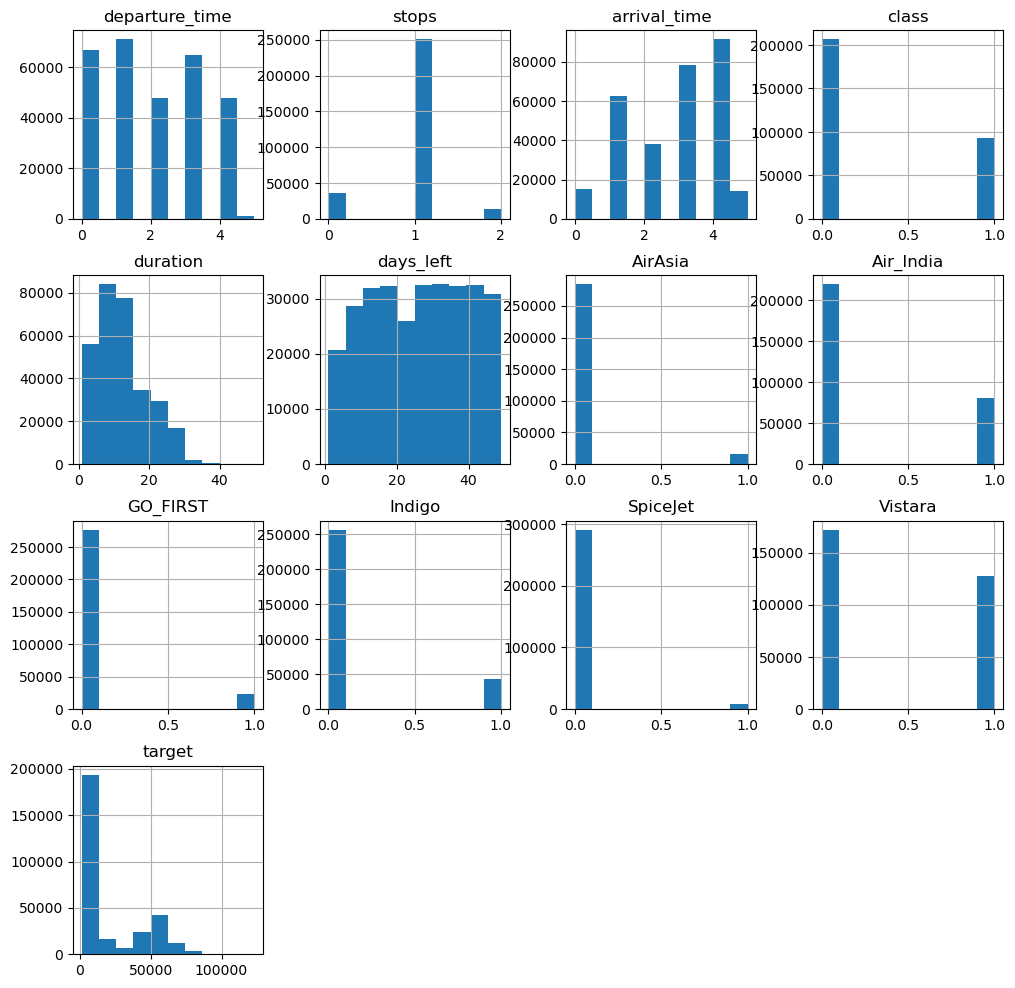

In [9]:
pre_f_df.hist(figsize=(12, 12))

In [10]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_f_df)
std_pre_f_df = pd.DataFrame(result, columns=pre_f_df.columns)
std_pre_f_df

departure_time     stops  arrival_time     class  duration  days_left  \
0             0.799464 -2.321779      0.962613 -0.672576 -1.397531  -1.843875   
1            -1.318909 -2.321779     -1.257243 -0.672576 -1.375284  -1.843875   
2            -1.318909 -2.321779     -1.997195 -0.672576 -1.397531  -1.843875   
3            -0.612785 -2.321779     -0.517291 -0.672576 -1.386407  -1.843875   
4            -0.612785 -2.321779     -1.257243 -0.672576 -1.375284  -1.843875   
...                ...       ...           ...       ...       ...        ...   
300148       -0.612785  0.190121      0.222661  1.486822 -0.297695   1.695692   
300149        0.093340  0.190121      0.962613  1.486822 -0.250421   1.695692   
300150       -1.318909  0.190121      0.962613  1.486822  0.223718   1.695692   
300151       -1.318909  0.190121      0.222661  1.486822 -0.308819   1.695692   
300152       -0.612785  0.190121      0.222661  1.486822 -0.297695   1.695692   

         AirAsia  Air_India  GO_FIRST    Indigo  SpiceJet   Vistara    target  
0      -0.238059  -0.607396 -0.289246 -0.409586  5.684155 -0.861451 -0.658068  
1      -0.238059  -0.607396 -0.289246 -0.409586  5.684155 -0.861451 -0.658068  
2       4.200638  -0.607396 -0.289246 -0.409586 -0.175928 -0.861451 -0.657936  
3      -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832 -0.657980  
4      -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832 -0.657980  
...          ...        ...       ...       ...       ...       ...       ...  
300148 -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832  2.131285  
300149 -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832  2.476694  
300150 -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832  2.564545  
300151 -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832  2.674071  
300152 -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832  2.674071  

[300153 rows x 13 columns]

In [11]:
condition = True
columns = ['departure_time', 'arrival_time', 'duration', 'days_left', 'target']
for column in columns:
    condition &= std_pre_f_df[column].between(-1.96, 1.96)

std_pre_f_df = std_pre_f_df[condition]
std_pre_f_df

departure_time     stops  arrival_time     class  duration  days_left  \
0             0.799464 -2.321779      0.962613 -0.672576 -1.397531  -1.843875   
1            -1.318909 -2.321779     -1.257243 -0.672576 -1.375284  -1.843875   
3            -0.612785 -2.321779     -0.517291 -0.672576 -1.386407  -1.843875   
4            -0.612785 -2.321779     -1.257243 -0.672576 -1.375284  -1.843875   
5            -0.612785 -2.321779     -0.517291 -0.672576 -1.375284  -1.843875   
...                ...       ...           ...       ...       ...        ...   
300141       -0.612785  0.190121      0.962613  1.486822  0.201471   1.695692   
300142        0.799464  0.190121     -1.257243  1.486822  0.525443   1.695692   
300143       -1.318909  0.190121      0.962613  1.486822  0.722885   1.695692   
300144        0.799464  0.190121     -1.257243  1.486822  0.931451   1.695692   
300145       -0.612785  0.190121     -1.257243  1.486822  1.509872   1.695692   

         AirAsia  Air_India  GO_FIRST    Indigo  SpiceJet   Vistara    target  
0      -0.238059  -0.607396 -0.289246 -0.409586  5.684155 -0.861451 -0.658068  
1      -0.238059  -0.607396 -0.289246 -0.409586  5.684155 -0.861451 -0.658068  
3      -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832 -0.657980  
4      -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832 -0.657980  
5      -0.238059  -0.607396 -0.289246 -0.409586 -0.175928  1.160832 -0.657980  
...          ...        ...       ...       ...       ...       ...       ...  
300141 -0.238059   1.646372 -0.289246 -0.409586 -0.175928 -0.861451  1.341779  
300142 -0.238059   1.646372 -0.289246 -0.409586 -0.175928 -0.861451  1.341779  
300143 -0.238059   1.646372 -0.289246 -0.409586 -0.175928 -0.861451  1.341779  
300144 -0.238059   1.646372 -0.289246 -0.409586 -0.175928 -0.861451  1.341779  
300145 -0.238059   1.646372 -0.289246 -0.409586 -0.175928 -0.861451  1.341779  

[259894 rows x 13 columns]

In [12]:
pre_f_df = pre_f_df.iloc[std_pre_f_df.index].reset_index(drop=True)
pre_f_df

departure_time  stops  arrival_time  class  duration  days_left  \
0                    3      0             4      0      2.17          1   
1                    0      0             1      0      2.33          1   
2                    1      0             2      0      2.25          1   
3                    1      0             1      0      2.33          1   
4                    1      0             2      0      2.33          1   
...                ...    ...           ...    ...       ...        ...   
259889               1      1             4      1     13.67         49   
259890               3      1             1      1     16.00         49   
259891               0      1             4      1     17.42         49   
259892               3      1             1      1     18.92         49   
259893               1      1             1      1     23.08         49   

        AirAsia  Air_India  GO_FIRST  Indigo  SpiceJet  Vistara  target  
0             0          0         0       0         1        0    5953  
1             0          0         0       0         1        0    5953  
2             0          0         0       0         0        1    5955  
3             0          0         0       0         0        1    5955  
4             0          0         0       0         0        1    5955  
...         ...        ...       ...     ...       ...      ...     ...  
259889        0          1         0       0         0        0   51345  
259890        0          1         0       0         0        0   51345  
259891        0          1         0       0         0        0   51345  
259892        0          1         0       0         0        0   51345  
259893        0          1         0       0         0        0   51345  

[259894 rows x 13 columns]

array([[<Axes: title={'center': 'departure_time'}>,
        <Axes: title={'center': 'stops'}>,
        <Axes: title={'center': 'arrival_time'}>,
        <Axes: title={'center': 'class'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'days_left'}>,
        <Axes: title={'center': 'AirAsia'}>,
        <Axes: title={'center': 'Air_India'}>],
       [<Axes: title={'center': 'GO_FIRST'}>,
        <Axes: title={'center': 'Indigo'}>,
        <Axes: title={'center': 'SpiceJet'}>,
        <Axes: title={'center': 'Vistara'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

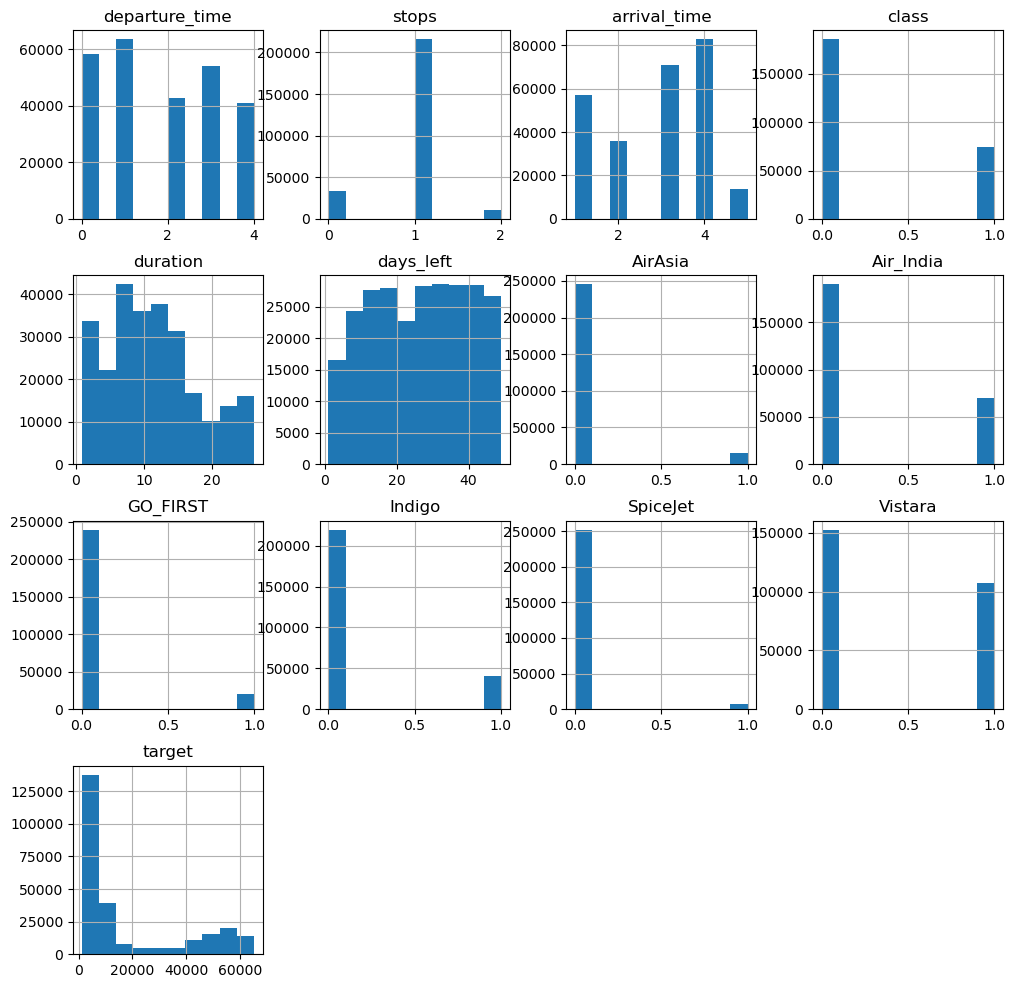

In [13]:
pre_f_df.hist(figsize=(12, 12))

In [14]:
import numpy as np

pre_f_df['target'] = np.log1p(pre_f_df['target'])

array([[<Axes: title={'center': 'departure_time'}>,
        <Axes: title={'center': 'stops'}>,
        <Axes: title={'center': 'arrival_time'}>,
        <Axes: title={'center': 'class'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'days_left'}>,
        <Axes: title={'center': 'AirAsia'}>,
        <Axes: title={'center': 'Air_India'}>],
       [<Axes: title={'center': 'GO_FIRST'}>,
        <Axes: title={'center': 'Indigo'}>,
        <Axes: title={'center': 'SpiceJet'}>,
        <Axes: title={'center': 'Vistara'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

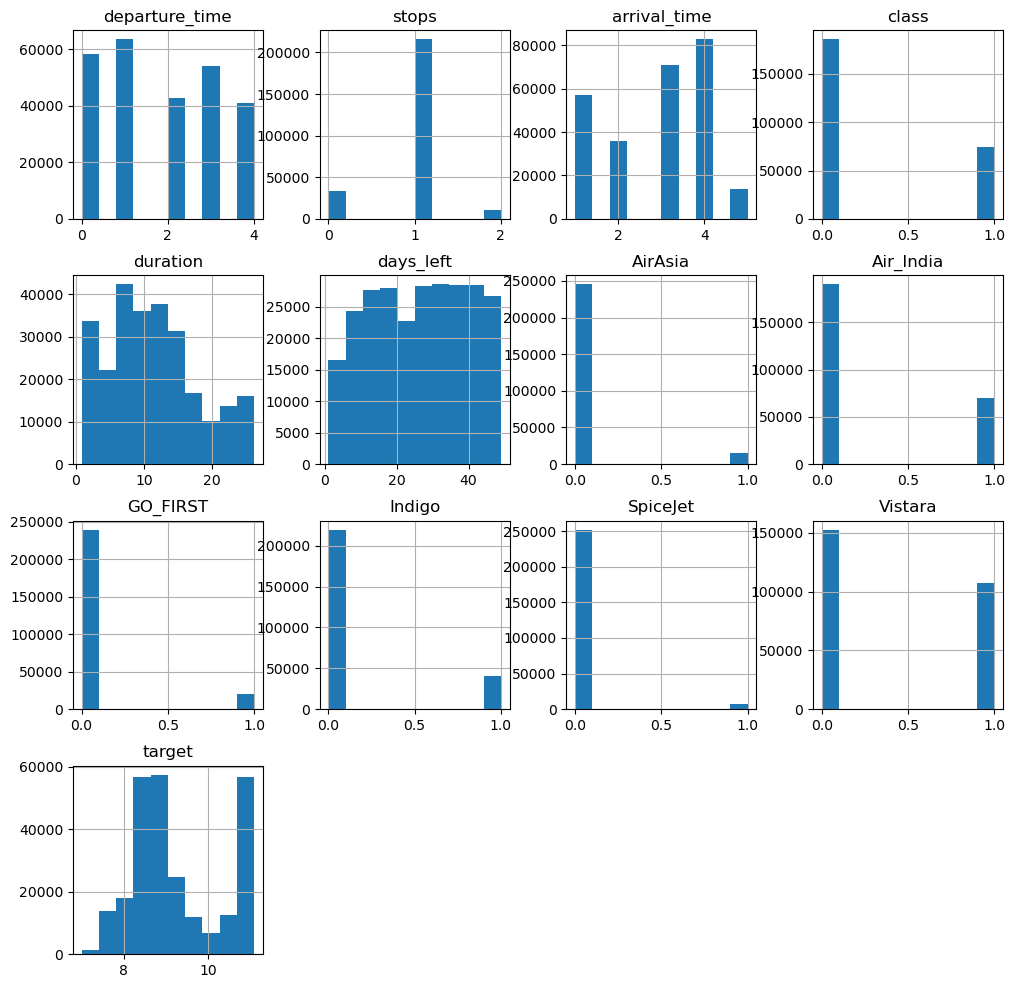

In [15]:
pre_f_df.hist(figsize=(12, 12))

In [28]:
pre_f_df.corr()['target'].sort_values(ascending=False)[1:]

class             0.900317
Vistara           0.327367
duration          0.278226
Air_India         0.184977
stops             0.154189
departure_time    0.016349
arrival_time     -0.049289
SpiceJet         -0.101886
days_left        -0.186452
GO_FIRST         -0.190068
AirAsia          -0.247030
Indigo           -0.325555
Name: target, dtype: float64

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_f_df.iloc[:, :-1], pre_f_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [18]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1148, RMSE: 0.3388, MSLE: 0.0012, RMSLE: 0.0343, R2: 0.8997


#### ü§î ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Í≥ºÏ†ÅÌï©Îêú Î™®Îç∏Ïù∏ÏßÄ ÌèâÍ∞Ä

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_f_df.iloc[:, :-1], pre_f_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# LinearRegression Î™®Îç∏ ÏÉùÏÑ±
lr = LinearRegression()

# ÍµêÏ∞®Í≤ÄÏ¶ù ÏàòÌñâ
cv_scores_train = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_scores_test = cross_val_score(lr, X_test, y_test, cv=10, scoring='neg_mean_squared_error')

# ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Í∞ÑÏùò ÏÑ±Îä• Ï∞®Ïù¥ Í≥ÑÏÇ∞
mean_train_score = cv_scores_train.mean()
mean_test_score = cv_scores_test.mean()

mean_train_score = -1 * mean_train_score
mean_test_score = -1 * mean_test_score

print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Ïùò MSEÌèâÍ∑†:', mean_train_score)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Ïùò MSEÌèâÍ∑†:', mean_test_score)

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Ïùò MSEÌèâÍ∑†: 0.11426600318016386
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Ïùò MSEÌèâÍ∑†: 0.11480501124997729


In [22]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kfold = KFold(n_splits=10, shuffle=True)

scores = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='r2')
for score in scores:
    print(f'{np.round(score, 4)}')

0.9013
0.8984
0.9014
0.8999
0.9015
0.9005
0.8996
0.8988
0.8999
0.9013


MSE: 0.1143, RMSE: 0.3380, MSLE: 0.0012, RMSLE: 0.0342, R2: 0.9003


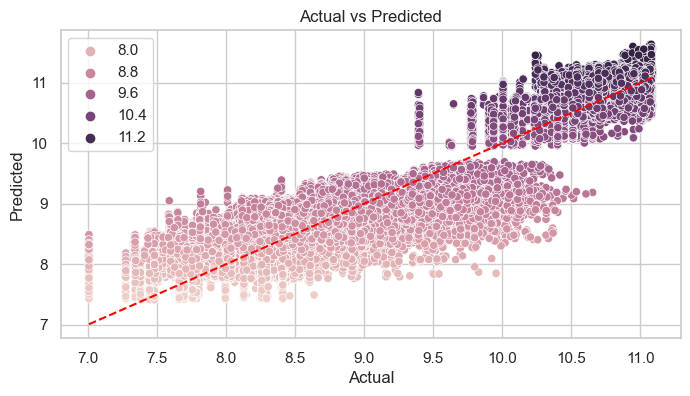

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

lr.fit(X_train, y_train)
prediction = lr.predict(X_train)
get_evaluation(y_train, prediction)

sns.set(style='whitegrid')
fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
ax.set_title('Actual vs Predicted')
sns.scatterplot(x=y_train, y=np.ravel(prediction), ax=ax, hue=np.ravel(prediction))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')  # ÎåÄÍ∞ÅÏÑ† Ï∂îÍ∞Ä
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

MSE: 0.1148, RMSE: 0.3388, MSLE: 0.0012, RMSLE: 0.0343, R2: 0.8997


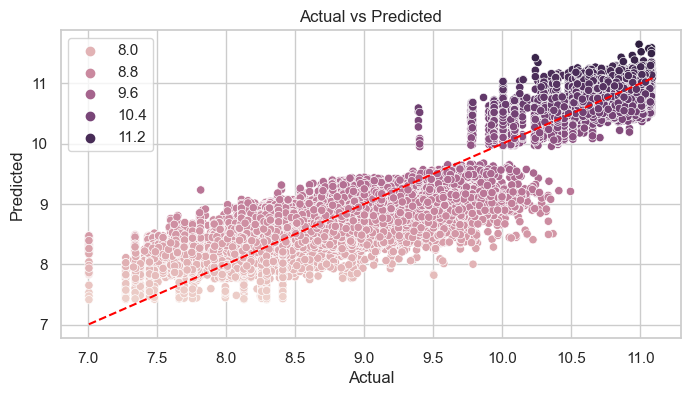

In [26]:
import matplotlib.pyplot as plt

lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
get_evaluation(y_test, prediction)

sns.set(style='whitegrid')
fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
ax.set_title('Actual vs Predicted')
sns.scatterplot(x=y_test, y=np.ravel(prediction), ax=ax, hue=np.ravel(prediction))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # ÎåÄÍ∞ÅÏÑ† Ï∂îÍ∞Ä
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

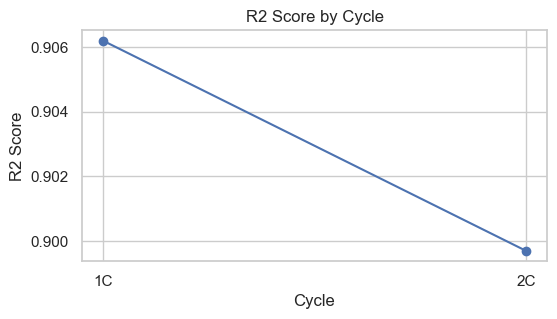

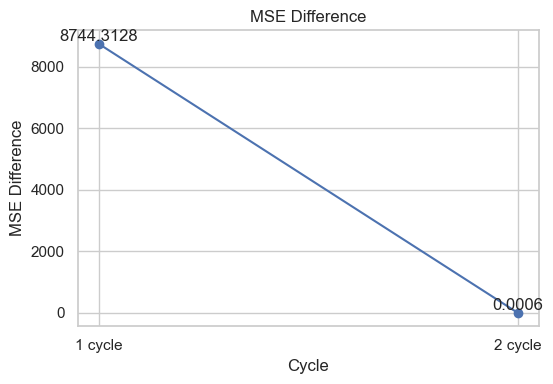

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# R2 score ÏãúÍ∞ÅÌôî
cycles = ['1C', '2C']
r2_scores = [0.9062, 0.8997]

plt.figure(figsize=(6, 3))
plt.plot(cycles, r2_scores, marker='o', linestyle='-')
plt.title('R2 Score by Cycle')
plt.xlabel('Cycle')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

# Îç∞Ïù¥ÌÑ∞
train_mse = [48217849.1184, 0.1148]
test_mse = [48209104.8056, 0.1142]
cycles = ['1 cycle', '2 cycle']

# MSE Ï∞®Ïù¥ Í≥ÑÏÇ∞
first_mse_diff = [train_mse[0] - test_mse[0], train_mse[1] - test_mse[1]]

# ÏÑ† Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5.7, 4))

plt.plot(cycles, first_mse_diff, marker='o')

# Í∞Å ÎßàÏª§ ÏúÑÏóê ÏàòÏπò Ï∂îÍ∞Ä
for i, diff in enumerate(first_mse_diff):
    plt.text(cycles[i], diff, f'{diff:.4f}', ha='center', va='bottom')

plt.title('MSE Difference')
plt.xlabel('Cycle')
plt.ylabel('MSE Difference')

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.tight_layout()
plt.show()

#### üìç ÏïÑÎûòÎäî 1 cycle Î∂ÄÌÑ∞ ÎßàÏßÄÎßâ ÌõàÎ†® Î™®Îç∏ÍπåÏßÄ Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏùÑ ÎπÑÍµêÌïú Í∑∏ÎûòÌîÑÏù¥Îã§.
Í≥ºÏ†ÅÌï©Ïù¥ Ìï¥Í≤∞ÎêòÎ©∞ Ï≤òÏùåÏóê ÎπÑÌï¥ ÏÑ±Îä•Ïù¥ Ïò¨ÎùºÍ∞ÄÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

- 1 Cycle

<img src="./images/flight1-1.png" width="600px">

- 2Cycle(Ïù¥ÏÉÅÏπò Ï†úÍ±∞ & ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ log ÏÇ¨Ïö© ÌõÑ)
  
<img src="./images/flight2-5.png" width="600px">